## Linear Regression:

Let us first understand what is Linear Regression:

Linear Regression is a Machine Learning model which is dependent on the linear relationship between a dependent variable and one or more independent variables.
When the twwo variables are in linear relationship then their values can be represented as statight line.
There are two type of Linear Regression depending on the number of independent variables:
- Simple Linear Regression: When there is only one independent variable
- Multiple Linear Regression: When there are more than one independent variables

What is dependent variable and independent variable?

1. Dependent variable: The variable whose value we need to forecast or predict is called dependent variable which is also known as "response" variable or "target" variable. Generally we denote it with letter 'y'

2. Independent variable: the variable which is used to calculate the value of another variable i.e. dependent variable is called independent variable. These are also known as "features" or "regressors".

## About the Ecommerce Customers data:

We will work on Ecommerce customer data from a company which is based in New York city that sells clothing online but they also have in-store style and clothing advice sessions.
Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.
Now, the company is trying to decide whether to focus their efforts on their mobile app experience or their website.

It has the customer information such as Email, address, avatar color which are text values while following information have numerical values:
* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member.
* Yearly Amount Spent: What is the amount spent by the customer on yearly basis which we will be predicting.


## Let's get started:

First we will import some libraries:

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Now we will read the Ecommerce Customers csv file into our notebook using pandas library:

In [31]:
df = pd.read_csv("Ecommerce Customers")

Using head() function we will see the first 5 customer's data by default.

In [32]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


Lets use info() and describe() function:
- info() is a method that provides a concise summary of the dataframe that includes information about data types, non-null values and memory usage.
- describe() is a method that generates descriptive statistics of the numerical columns like count, standard deviatioan, mean, minimum and maximum values, etc.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [34]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


Using info() method, we can conclude that there are no values in our dataset.
Now let's start with Exploratory Data Analysis and before moving forward let's understand what does it mean.

## Exploratory Data Analysis:

EDA is a process of analyzing and visualizing the data and summarize its main characteristics using some statistical graphics and other data visualization methods.
Generally EDA is used to identify the structure and patterns within the data, detect outliers or anomalies and forms hypotheses for further analysis.
Below are the key aspects:
- Identifying basic statistics like mean, median, mode, standard deviation, etc to understand spread of the data.
- Handling any missing values or data
- Creating some visual representations using charts, graphs, scatterplot, etc to identify trends and distribution of variables.
- Scaling, normalizing or encoding categorical variables
- Investigating some correlation analysis and identifying relationships between variables.

Lets have some visualizations.

### Pairplot:

It gives a matrix of scatterplots for multiple variables in order to visualize the relationships between pairs of variables.
It also helps to identify patterns and outliers between pairs of variables.

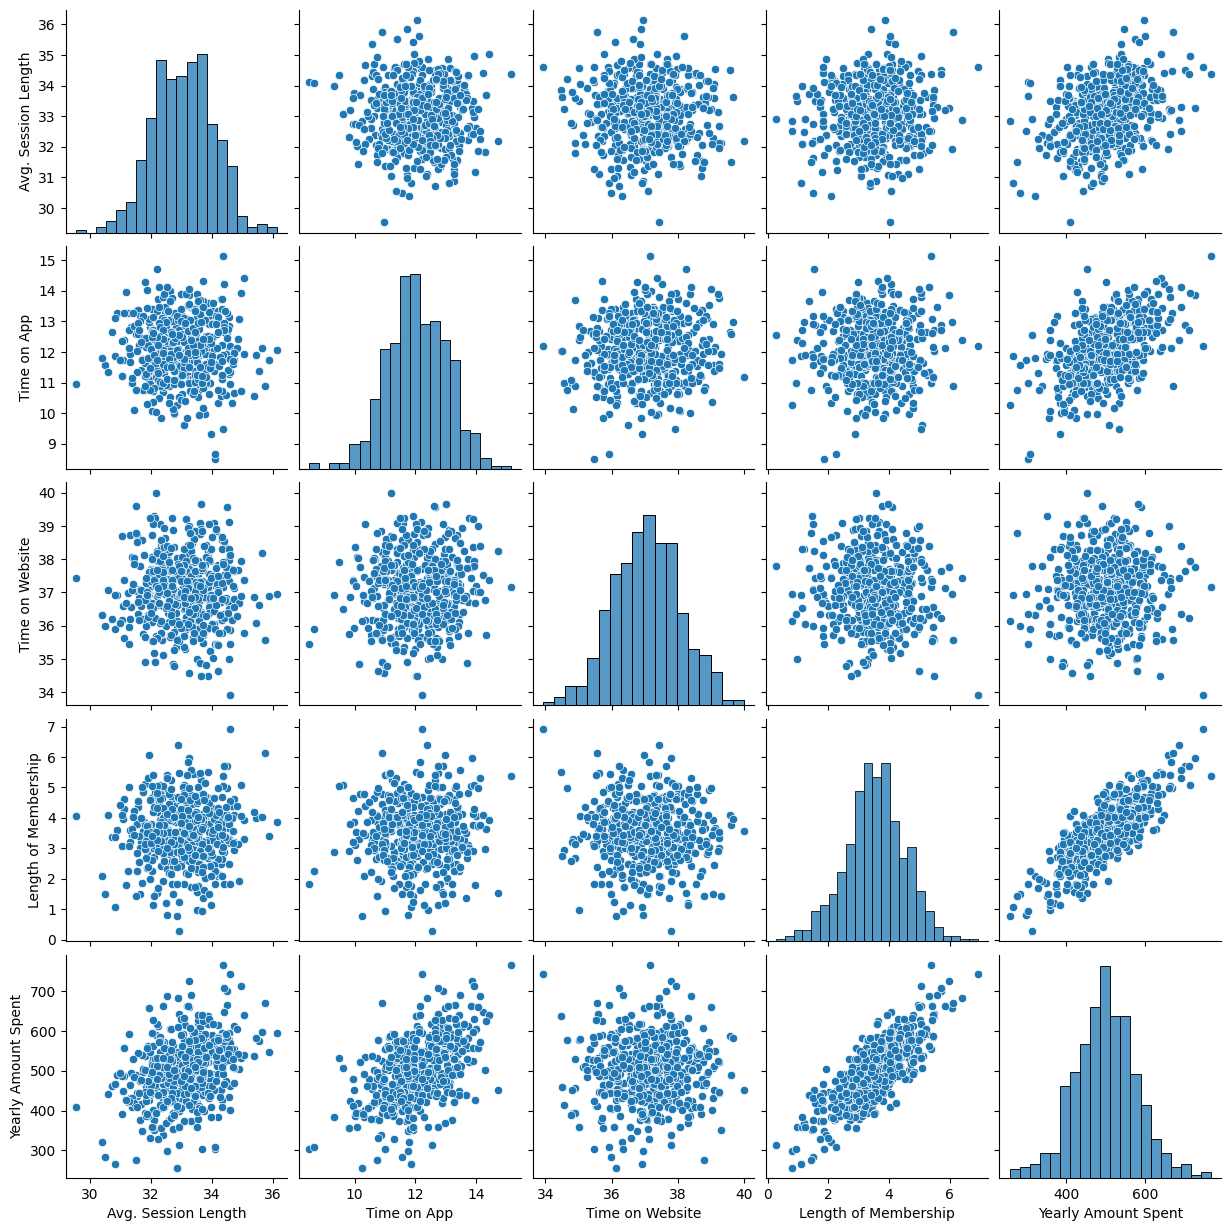

In [35]:
sns.pairplot(df)
plt.show()

From the pairplot, we can conclude that "Length of Membership" and "Yearly Amount Spent" both are highly correlated and mostly follows linear relationship.

### Jointplot:

It is used to explore the relationship between two variables and it focuses mainly on a single pair of variables and provides more information in terms of univariate distributions and bivariate distribution.
- The central plot is a scatterplot which is bivariate scatterplot showing the relationship between two variables.
- Along the top and right sides of scatterplot, there are histograms or sometime kernal density plots for individual variable.

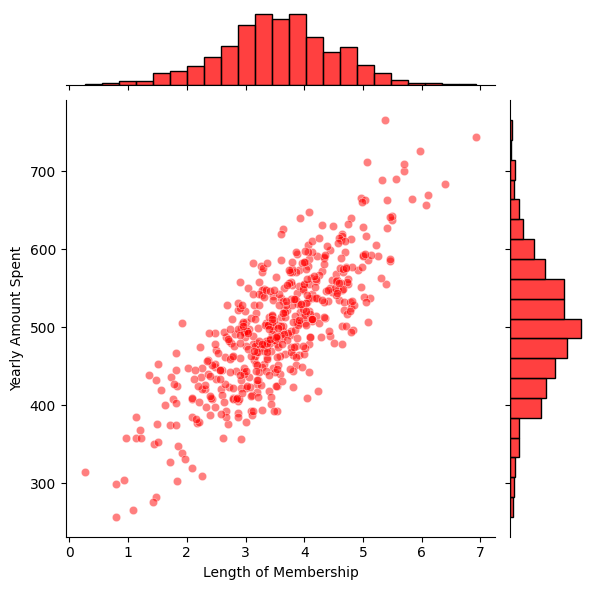

In [36]:
sns.jointplot(x='Length of Membership',y='Yearly Amount Spent', data = df,color = 'r',alpha = 0.5)      #alpha means transparency
plt.show()

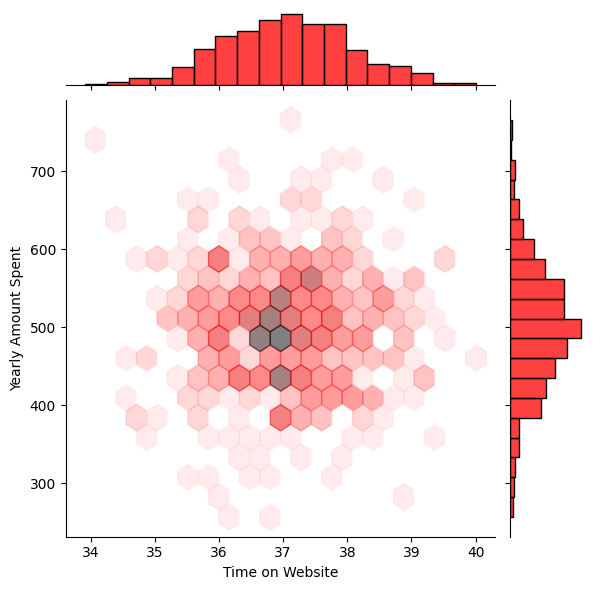

In [37]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent', data = df,color = 'r',alpha = 0.5, kind='hex')      #alpha means transparency
plt.show()

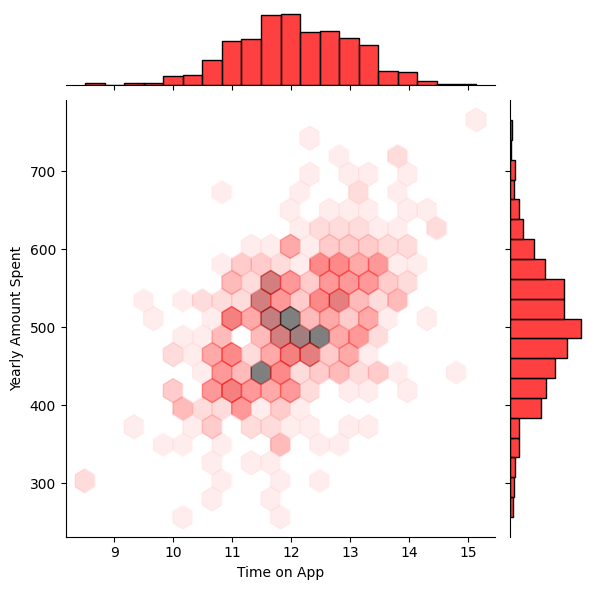

In [38]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent', data = df,color = 'r',alpha = 0.5, kind = 'hex')      #alpha means transparency
plt.show()

- More the time of membership --> More spent on yearly
- People spent more time on website compared to App but spent averagely same amount through App or Website

Let's create linear model plot and see how the regression line passes through the values

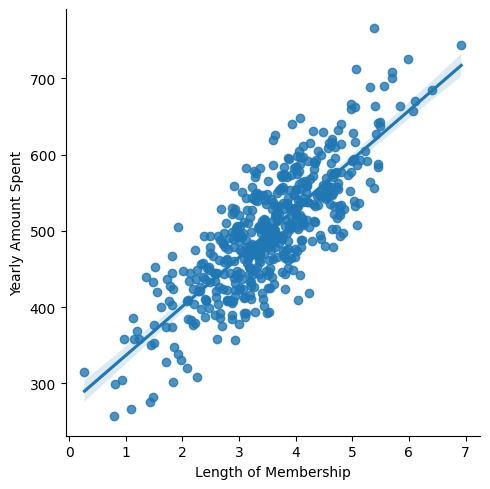

In [39]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=df)
plt.show()

### BOXPLOT:

- It is also known as box and whisker plot which is used to represent the distribution of dataset.
- It provides the data's central tendency, spread and outliers.
- It provides statistical measures like minimum, first quartile (Q1), median, third quartile (Q3) and maximum.

In [40]:
from ipywidgets import widgets

In [41]:
## Here I have used widgets so that we can see all data in a single graph just by selecting the variable from the dropdown list

def boxplot(x):
    for i in list(df.columns[3:]):
        if x==i:
            plt.figure(figsize=(5,5))
            sns.boxplot(y=df[i],color='purple')
            plt.show()
            
widgets.interactive(boxplot,x=list(df.columns[3:]))

interactive(children=(Dropdown(description='x', options=('Avg. Session Length', 'Time on App', 'Time on Websit…

Now we will start our model creation and we will focus on simple linear regression and then we will go to multiple linear regression.

## Linear Regression:

First create training and test data:

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

We should always use independent variable in 2D array form and dependent variable in 1D array.

In [43]:
# Lets create X and y variable:

X = df[['Length of Membership']]
y = df['Yearly Amount Spent']

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [45]:
# Predict the y_test values:
y_pred = lr.predict(X_test)

Plot a scatterplot of y_test versus y_pred

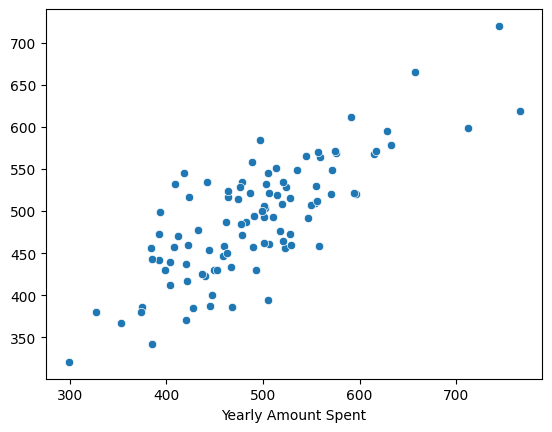

In [46]:
sns.scatterplot(x=y_test,y=y_pred)
plt.show()

Evaluating the model:

In [47]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [48]:
print("Accuracy of the model",r2_score(y_test,y_pred))
print("Mean absolute error of the model",mean_absolute_error(y_test,y_pred))
print("Mean sqaure error of the model",mean_squared_error(y_test,y_pred))
print("Root mean square error of the model",np.sqrt(mean_squared_error(y_test,y_pred)))

Accuracy of the model 0.6094800835575334
Mean absolute error of the model 40.20933573768912
Mean sqaure error of the model 2627.2128470978655
Root mean square error of the model 51.25634445703152


Here we can the model performance is around 60.9 % which is quite less and RMSE is around 51 which is quite high compared to average amount spent of 499.3 and hence we can conclude that we need to use more features as well and hence we can go to multiple linear regression model.

## MULTIPLE LINEAR REGRESSION:

Create training and test data.

In [49]:
# Make independent and dependent variables

X=df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y=df['Yearly Amount Spent']

In [50]:
# Splitting and fitting the data

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
mlr = LinearRegression()
mlr.fit(X_train,y_train)

LinearRegression()

In [51]:
# Prediction of the data

y_pred = mlr.predict(X_test)

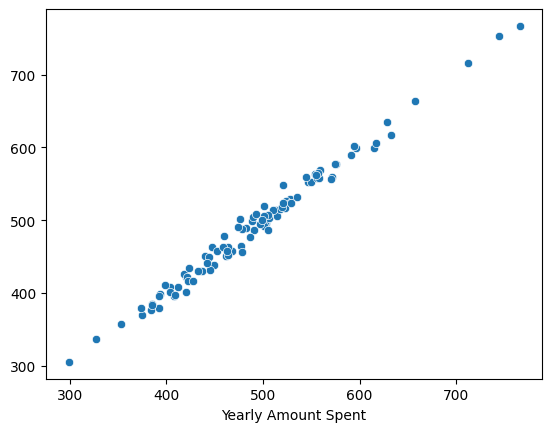

In [52]:
# Plotting the predicted data and real data and analyzing it

sns.scatterplot(x=y_test,y=y_pred)
plt.show()

Evaluating the model:

In [53]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("Accuracy of the model",r2_score(y_test,y_pred))
print("Mean absolute error of the model",mean_absolute_error(y_test,y_pred))
print("Mean sqaure error of the model",mean_squared_error(y_test,y_pred))
print("Root mean square error of the model",np.sqrt(mean_squared_error(y_test,y_pred)))

Accuracy of the model 0.9861924261981547
Mean absolute error of the model 7.645674798915286
Mean sqaure error of the model 92.89010304498527
Root mean square error of the model 9.637951185028136


Now we can compare both the models and conclude that multiple linear regression performs much better than simple linear regression. We almost got the accuracy of 98.6% for multiple linear regression.

-------------------------------------